In [137]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt
import torch.nn as nn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")

In [138]:
EV_Stations = pd.DataFrame(pd.read_csv('EV_stations.csv'))
EV_Stations.head()

,Country,State,ZIP,Latitude,Longitude,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,ID,Open Date,Access Code,Facility Type,EV On-Site Renewable Source
0,US,AK,99801,58.354895,-134.495377,NaN,2.0,NaN,72524,2/1/15,public,UTILITY,NaN
1,US,AK,99801,58.298366,-134.404006,NaN,2.0,NaN,81601,2/1/17,public,PARKING_GARAGE,NaN
2,US,AK,99801,58.363727,-134.575550,NaN,1.0,NaN,85589,8/1/15,public,OFFICE_BLDG,HYDRO
3,US,AK,99518,61.169369,-149.911144,NaN,2.0,NaN,88609,11/30/17,public,NaN,NaN
4,US,AK,99669,60.494658,-151.045242,NaN,3.0,NaN,112694,11/27/17,public,RESTAURANT,NaN


In [139]:
EV_Stations = EV_Stations[EV_Stations['State']=='WA']
EV_Stations.head()

,Country,State,ZIP,Latitude,Longitude,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,ID,Open Date,Access Code,Facility Type,EV On-Site Renewable Source
51405,US,WA,98503,47.044011,-122.822404,NaN,4.0,NaN,33351,1/15/18,public,MUNI_GOV,NaN
51406,US,WA,98188,47.443377,-122.296229,36.0,NaN,NaN,33717,3/1/10,public,AIRPORT,NaN
51407,US,WA,98502,47.035421,-122.938962,2.0,NaN,NaN,35337,8/15/09,public,GROCERY,NaN
51408,US,WA,99252,47.673347,-117.388933,1.0,2.0,NaN,35620,4/15/10,public,OFFICE_BLDG,NaN
51409,US,WA,99201,47.654998,-117.425025,NaN,4.0,NaN,35621,4/15/10,public,RESTAURANT,NaN


In [140]:
features = ['ZIP', 'Latitude', 'Longitude', 'ID','Open Date']
EV_Stations = EV_Stations[features]
EV_Stations.head()

,ZIP,Latitude,Longitude,ID,Open Date
51405,98503,47.044011,-122.822404,33351,1/15/18
51406,98188,47.443377,-122.296229,33717,3/1/10
51407,98502,47.035421,-122.938962,35337,8/15/09
51408,99252,47.673347,-117.388933,35620,4/15/10
51409,99201,47.654998,-117.425025,35621,4/15/10


In [141]:
EV_Stations.drop_duplicates(subset = "ID",keep = False, inplace= True) ##dropping duplicate vins
EV_Stations.head()

,ZIP,Latitude,Longitude,ID,Open Date
51405,98503,47.044011,-122.822404,33351,1/15/18
51406,98188,47.443377,-122.296229,33717,3/1/10
51407,98502,47.035421,-122.938962,35337,8/15/09
51408,99252,47.673347,-117.388933,35620,4/15/10
51409,99201,47.654998,-117.425025,35621,4/15/10


In [142]:
y=EV_Stations['Open Date'].values

for i in range(len(y)):
    y[i] = int(y[i].split("/")[-1])
print(y)

[18 10 9 ... 22 22 22]


In [143]:
def findingyears(year):
    x=np.where(EV_Stations == year)
    return x

In [144]:
#findingyears(7)

In [145]:
arr = [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
arr1 = []

for i in range(len(arr)):
    x = findingyears(arr[i])
    x = np.array(x)
    arr1.append(x.size/2)
#EV_Title_Year.insert(loc = 2, column = "Number of EV", value = arr1)
arr1

[1.0,
 2.0,
 7.0,
 57.0,
 38.0,
 16.0,
 38.0,
 65.0,
 81.0,
 97.0,
 106.0,
 175.0,
 206.0,
 683.0,
 264.0]

In [161]:
zipped = list(zip(arr, arr1))
df = pd.DataFrame(zipped, columns=['Year', 'Total_Installed'])
df.head()

,Year,Total_Installed
0,8,1.0
1,9,2.0
2,10,7.0
3,11,57.0
4,12,38.0


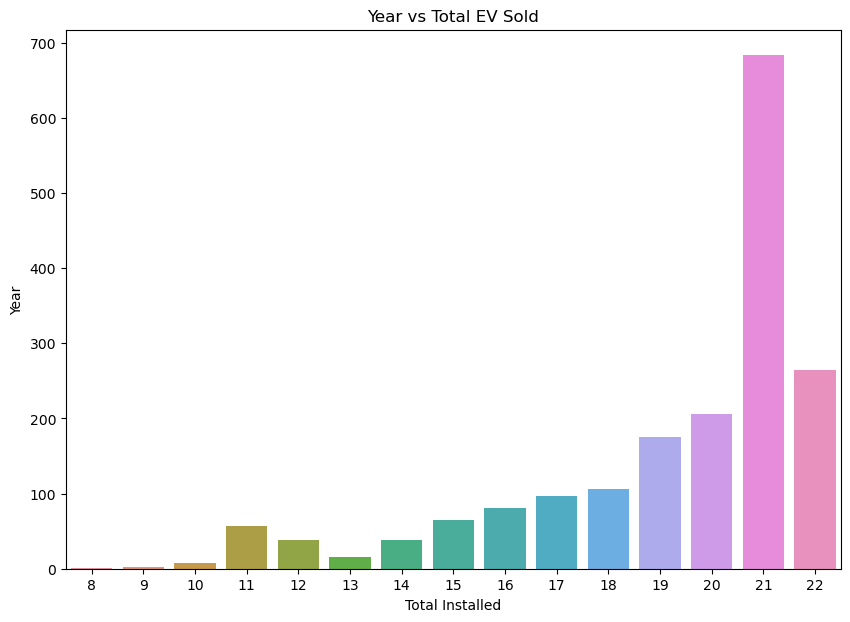

In [147]:
fig=plt.figure(figsize = (10, 7))
sns.barplot(x="Year", y="Total_Installed", data=df)
plt.title('Year vs Total EV Sold')
plt.xlabel('Total Installed')
plt.ylabel('Year')
plt.show()

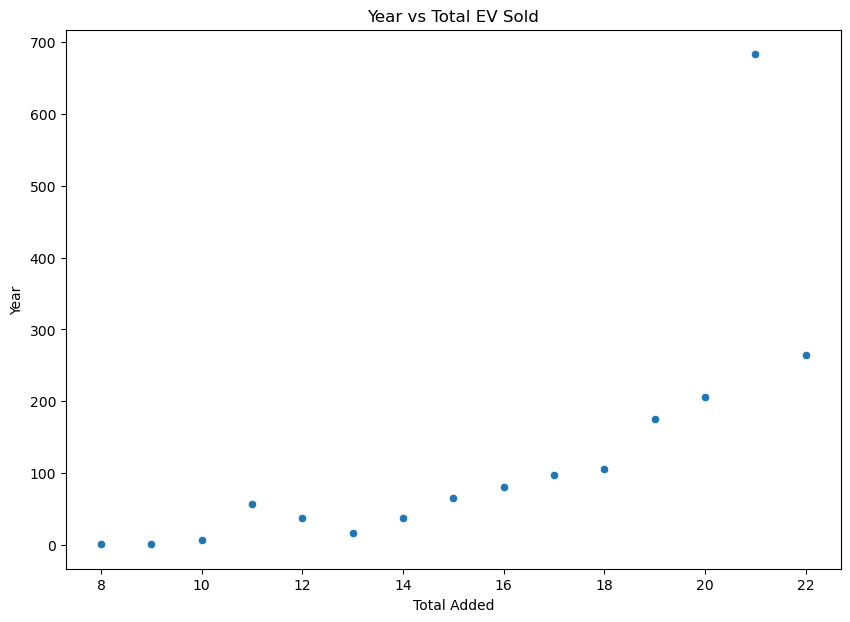

In [148]:
fig=plt.figure(figsize = (10, 7))
sns.scatterplot(x="Year", y="Total_Installed", data=df)
plt.title('Year vs Total EV Sold')
plt.xlabel('Total Added')
plt.ylabel('Year')
plt.show()

In [149]:
X=np.array(df["Year"].values)
y=np.array(df["Total_Installed"].values)

X=X.reshape(-1,1)
y=y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [150]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm = min_max_scaler.transform(X)

In [151]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)
print (xtrain[0:10, :])

[[ 1.43109747]
 [-0.72535077]
 [-1.15664042]
 [ 1.21545265]
 [ 0.56851817]
 [-0.0784163 ]
 [ 0.784163  ]
 [-0.9409956 ]
 [-1.58793007]
 [-0.50970595]]


In [152]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)
from sklearn import datasets, linear_model, metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score

classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [153]:
classifier.predict(X_train)

array([[343.18754804],
       [ 47.69946195],
       [-11.39815527],
       [313.63873943],
       [224.9923136 ],
       [136.34588778],
       [254.54112221],
       [ 18.15065334],
       [-70.49577248],
       [ 77.24827056],
       [284.08993082]])

Text(0, 0.5, 'Year')

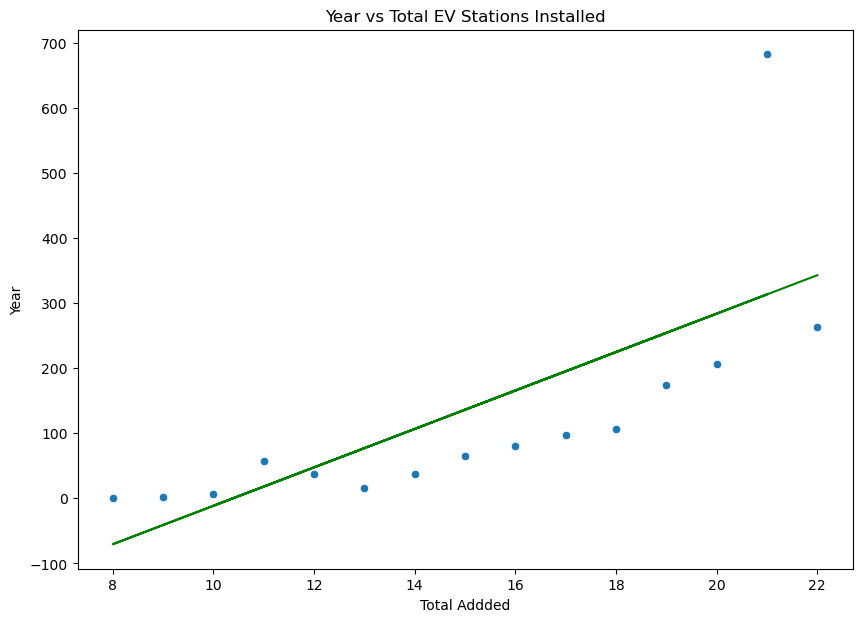

In [154]:
x=X_train
y=y_train
n = np.size(x)

y_pred = classifier.predict(X_train)
    
fig=plt.figure(figsize = (10, 7))
plt.title('Year vs Total EV Stations Installed')
sns.scatterplot(x="Year", y="Total_Installed", data=df)
plt.plot(x, y_pred, color = 'green')
plt.xlabel('Total Addded')
plt.ylabel('Year')

In [155]:
print('Variance score: {}'.format(classifier.score(X_test, y_test)))

Variance score: -3.2397892286312526


In [156]:
x=X_train
y=y_train
n = np.size(x)

# Fit the data(train the model)
classifier.fit(x, y)
  
# Predict
y_predicted = classifier.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
  
# printing values
print('Slope:' ,classifier.coef_)
print('Intercept:', classifier.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[29.54880861]]
Intercept: [-306.88624135]
MSE: 16834.31653972468
Root mean squared error:  129.7471253620853
R2 score:  0.5272622432415284


Text(0, 0.5, 'Year')

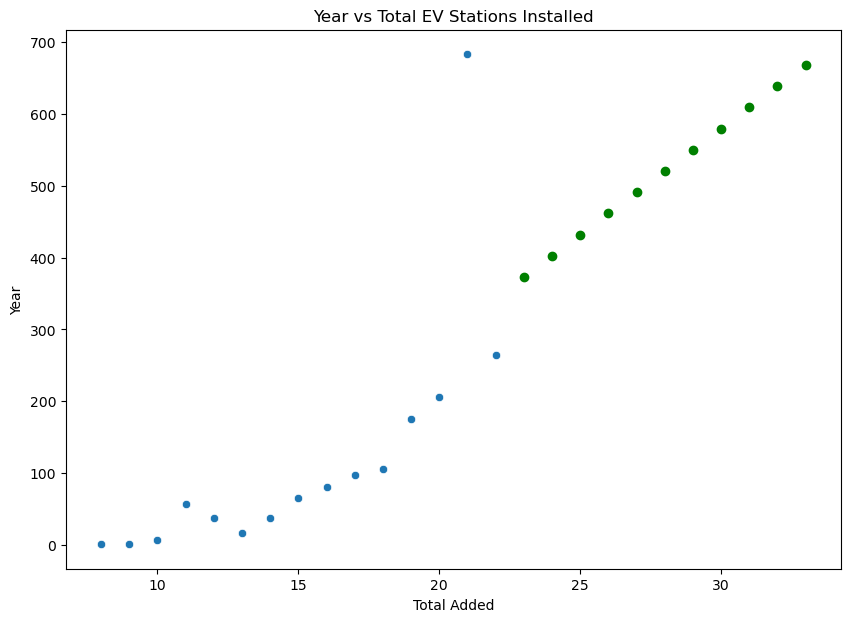

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# You haven't provided the values of X_train and y_train, so I'm going to
# use the years list as the x values and an array of zeros as the y values
# for this example.

x = [23,24,25,26,27,28,29,30,31,32,33]
y = np.zeros(len(x))

# You also haven't provided the classifier object, so I'm going to use a
# dummy object for this example.

# Now we can use the x and y values to plot the data

# Reshape the x array to be a 2D array of size (n, 1) where n is the
# number of elements in the array
x = np.array(x).reshape(-1, 1)

# Use the classifier object to predict the y values for the x values
y_pred = classifier.predict(x)

# Create a figure object with a specified size
fig = plt.figure(figsize=(10, 7))

# Add a title to the plot
plt.title('Year vs Total EV Stations Installed')

# Plot the x and y values as a scatterplot
sns.scatterplot(x="Year", y="Total_Installed", data=df)

# Plot the predicted y values against the x values as a scatter plot
plt.scatter(x, y_pred, color='green')

# Label the x and y axes
plt.xlabel('Total Added')
plt.ylabel('Year')

In [215]:
# Use the model to predict new data
features = ['Latitude']
lat=EV_Stations[features].values
features = ['Longitude']
log=EV_Stations[features].values

zipped = list(zip(log, lat))
d = pd.DataFrame(zipped, columns=['Longitude','Latitude'])

zipped = list(zip(arr,arr1,log,lat))

new_data = d = pd.DataFrame(zipped, columns=['Year','Total_Installed','Longitude','Latitude'])
new_data

,Year,Total_Installed,Longitude,Latitude
0,8,1.0,[-122.822404],[47.044011]
1,9,2.0,[-122.296229],[47.443377]
2,10,7.0,[-122.938962],[47.035421]
3,11,57.0,[-117.388933],[47.673347]
4,12,38.0,[-117.425025],[47.654998]
5,13,16.0,[-122.193162],[47.614744]
6,14,38.0,[-122.976675],[47.071917]
7,15,65.0,[-122.0195],[47.545324]
8,16,81.0,[-122.091237],[47.675897]
9,17,97.0,[-122.191915],[47.761878]


In [219]:
features = ['Latitude']
lat=EV_Stations[features].values
features = ['Longitude']
log=EV_Stations[features].values

zipped = list(zip(log, lat))

y = pd.DataFrame(zipped, columns=['Longitude','Latitude'])
y

,Longitude,Latitude
0,[-122.822404],[47.044011]
1,[-122.296229],[47.443377]
2,[-122.938962],[47.035421]
3,[-117.388933],[47.673347]
4,[-117.425025],[47.654998]
...,...,...
1831,[-122.292929],[47.418161]
1832,[-122.351622],[47.614387]
1833,[-122.823353],[47.050128]
1834,[-122.098617],[47.663672]


ValueError: x and y must have same first dimension, but have shapes (15, 1) and (1836, 2)

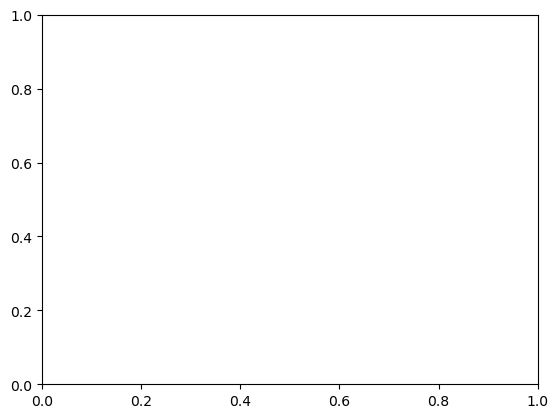

In [223]:
X=np.array(df["Year"].values)

X=X.reshape(-1,1)

plt.plot(X, y)
plt.xlabel('Latitude, Longitude, and Rate of Change')
plt.ylabel('Predicted Value')
plt.show()

In [222]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Use the model to predict new data
predicted_value = model.predict(new_data)

# Plot the new data
plt.plot(new_data, predicted_value)
plt.xlabel('Latitude, Longitude, and Rate of Change')
plt.ylabel('Predicted Value')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [15, 1836]